In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import xlsxwriter

for zz in range(1,2):

    if zz < 10:
        part_number = '20'+str(zz)
    else:
        part_number = '2'+str(zz)


    # Set matplotlib parameters for displaying graphs
    sns.set_style('darkgrid')
    plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
    plt.rcParams['font.size']= 14
    pd.set_option('display.max_columns', None)

    save_dir = '../data/part'+part_number+'/figures/'

    p = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
    ecg = pickle.load(open(p,"rb"))
    eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p',"rb"))
    rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p',"rb"))
    data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
 
    
    rate = 2000

    data, sampling_rate = nk.read_acqknowledge(data_file)
    data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                                "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

    timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
    start_times = timestamps[int(part_number[-2:]) - 1]
    feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

    taskloads_all = np.loadtxt('../support/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
    taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

    durations = [100,100,100,100,100,100,100,100,100,100,100,100]
    #durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

    events = {}
    events['onset'] = start_times
    events['duration'] = durations
    events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
    events['condition'] =  taskload_settings
    #events['trust'] = trust_settings DOES NOT WORK!

    events_feedback = {}
    events_feedback['onset'] = feedback_times
    events_feedback['duration'] = durations
    events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
    events_feedback['condition'] =  taskload_settings

    
    hrvs = []
    
    #ecg_pilot_interval starts at index 1
    for index in range(1,13):
        hrvs.append([np.mean(rsp), np.std(rsp)])
    
    filepath = '../data/part'+part_number+'/RSP baseline.csv'
    f=open(filepath,'ab')
    
    #hrvs starts at index 0
    for iind in range(1):
        print("FUCK ME")
        #np.savetxt(f,hrvs[iind])
    f.close()




FUCK ME


In [25]:
hrvs[1][0]

RSP_Raw                  6.622968
RSP_Clean                0.352979
RSP_Amplitude            1.828781
RSP_Rate                14.347708
RSP_Phase                0.435485
RSP_Phase_Completion     0.383867
RSP_Peaks                0.000096
RSP_Troughs              0.000096
dtype: float64

In [26]:
rsp

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs
0,7.755737,0.282917,1.319209,14.376736,NaN,0.0,0.0,0.0
1,7.756042,0.324371,1.319209,14.376736,NaN,0.0,0.0,0.0
2,7.755737,0.365714,1.319209,14.376736,NaN,0.0,0.0,0.0
3,7.755432,0.406946,1.319209,14.376736,NaN,0.0,0.0,0.0
4,7.756042,0.448064,1.319209,14.376736,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
124503,6.105347,0.104104,2.858796,14.023606,NaN,0.0,0.0,0.0
124504,6.105652,0.080698,2.858796,14.023606,NaN,0.0,0.0,0.0
124505,6.106262,0.057302,2.858796,14.023606,NaN,0.0,0.0,0.0
124506,6.105957,0.033918,2.858796,14.023606,NaN,0.0,0.0,0.0


<IPython.core.display.Javascript object>


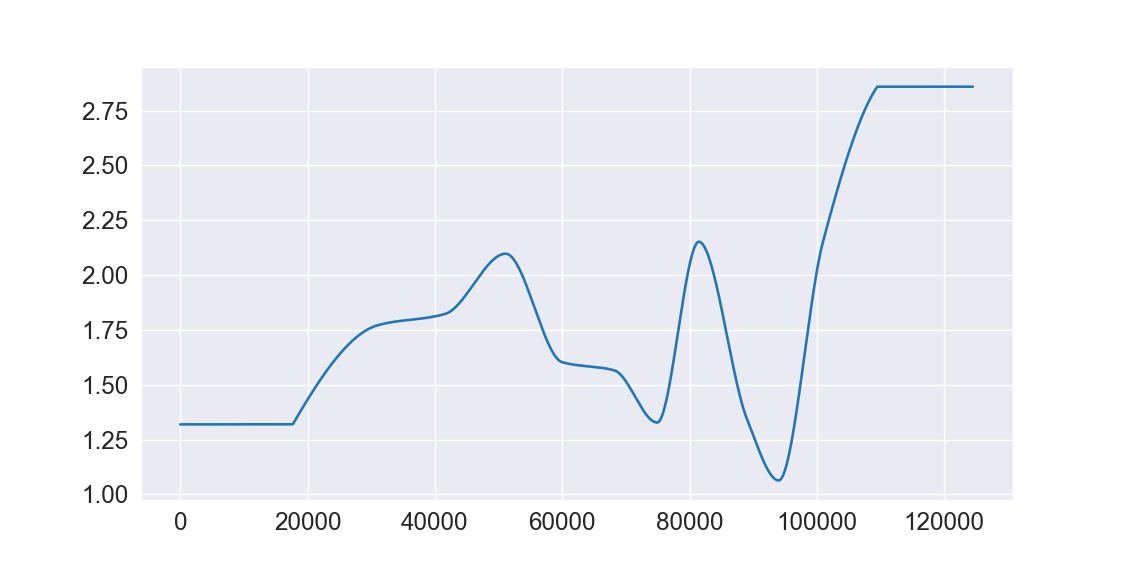

In [24]:
plt.figure()
plt.plot(rsp['RSP_Amplitude'])

In [47]:
np.shape(x)

(2, 11)

<IPython.core.display.Javascript object>


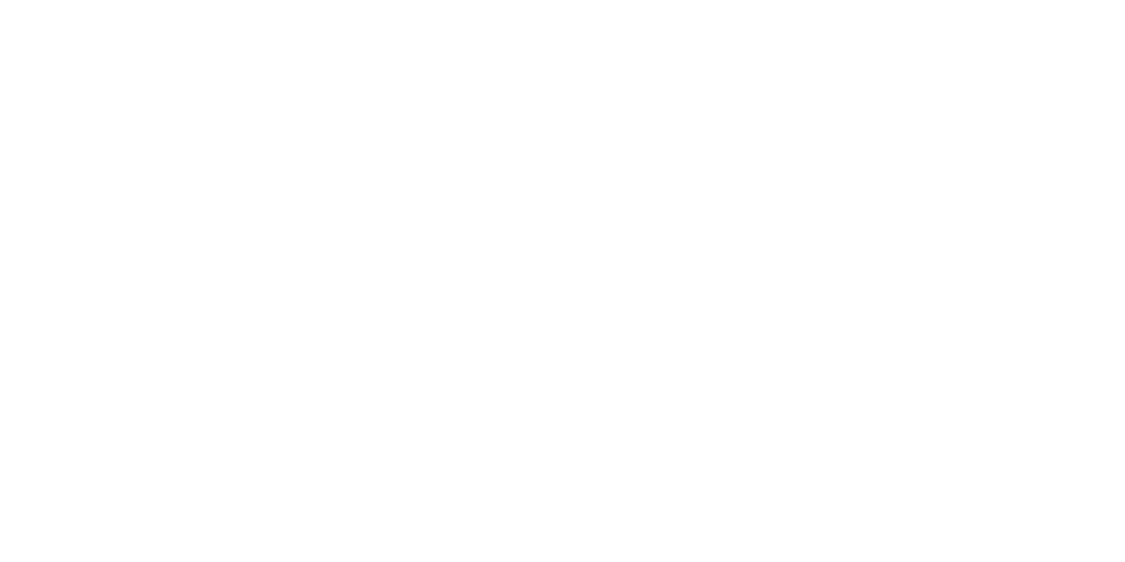

IndexError: list index out of range

In [12]:
plt.figure()
plt.plot(hrvs[1][2])


<IPython.core.display.Javascript object>


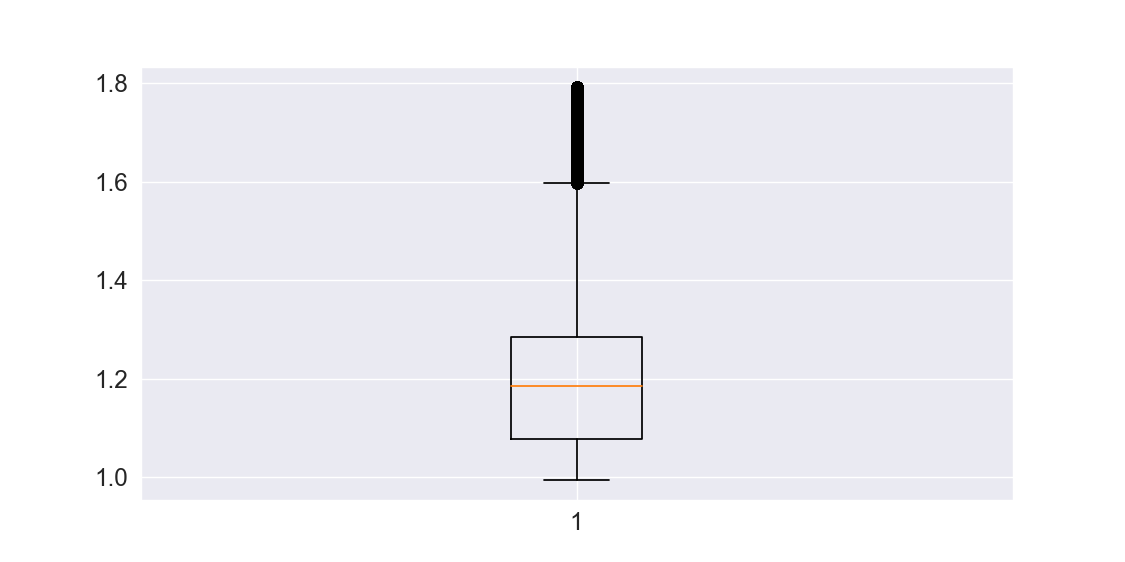

{'boxes': [<matplotlib.lines.Line2D at 0x2772c466c18>],
 'caps': [<matplotlib.lines.Line2D at 0x2772c4744a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2772c474d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2772c474a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2772c466eb8>,
  <matplotlib.lines.Line2D at 0x2772c4741d0>]}

In [5]:
plt.figure()
plt.boxplot(rsp_pilot_interval[2]['RSP_Amplitude'])


In [9]:
nk.rsp_analyze(rsp_pilot_interval[1],sampling_rate=2000)

KeyError: 0

In [32]:
rsp_pilot_interval[1]

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs,Index,Label,Condition
0.0000,1.222229,-2.616742,5.054635,20.816079,0.0,0.970231,0.0,0.0,425154,1,3
0.0005,1.222229,-2.617078,5.054355,20.815011,0.0,0.970479,0.0,0.0,425155,1,3
0.0010,1.223145,-2.617412,5.054075,20.813943,0.0,0.970727,0.0,0.0,425156,1,3
0.0015,1.223145,-2.617743,5.053795,20.812876,0.0,0.970975,0.0,0.0,425157,1,3
0.0020,1.222839,-2.618071,5.053515,20.811808,0.0,0.971223,0.0,0.0,425158,1,3
...,...,...,...,...,...,...,...,...,...,...,...
49.9980,7.509155,0.423156,2.243203,1.389070,1.0,0.797474,0.0,0.0,525149,1,3
49.9985,7.510376,0.423571,2.243210,1.389064,1.0,0.797491,0.0,0.0,525150,1,3
49.9990,7.510986,0.423984,2.243217,1.389057,1.0,0.797508,0.0,0.0,525151,1,3
49.9995,7.510376,0.424398,2.243224,1.389051,1.0,0.797524,0.0,0.0,525152,1,3


In [22]:
nk.rsp_plot(rsp_pilot_interval[1])

<IPython.core.display.Javascript object>

KeyError: "None of [Int64Index([2729, 23181], dtype='int64')] are in the [index]"

In [21]:
rsp_pilot_interval[1]['RSP_Peaks']

0.0000     0.0
0.0005     0.0
0.0010     0.0
0.0015     0.0
0.0020     0.0
          ... 
49.9980    0.0
49.9985    0.0
49.9990    0.0
49.9995    0.0
50.0000    0.0
Name: RSP_Peaks, Length: 100000, dtype: float64

In [25]:
rsp_pilot_interval[2]

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs,Index,Label,Condition
0.0000,2.379456,-1.480394,5.031071,20.200734,1.0,0.273123,0.0,0.0,1426540,2,3
0.0005,2.382507,-1.478262,5.030516,20.200185,1.0,0.273486,0.0,0.0,1426541,2,3
0.0010,2.383423,-1.476130,5.029961,20.199635,1.0,0.273848,0.0,0.0,1426542,2,3
0.0015,2.384338,-1.473998,5.029406,20.199086,1.0,0.274211,0.0,0.0,1426543,2,3
0.0020,2.387695,-1.471865,5.028851,20.198537,1.0,0.274574,0.0,0.0,1426544,2,3
...,...,...,...,...,...,...,...,...,...,...,...
49.9980,7.290649,0.252217,2.801523,2.030852,1.0,0.807988,0.0,0.0,1526535,2,3
49.9985,7.290649,0.251902,2.801557,2.030845,1.0,0.808006,0.0,0.0,1526536,2,3
49.9990,7.290649,0.251586,2.801590,2.030837,1.0,0.808023,0.0,0.0,1526537,2,3
49.9995,7.289124,0.251270,2.801623,2.030830,1.0,0.808040,0.0,0.0,1526538,2,3


<IPython.core.display.Javascript object>


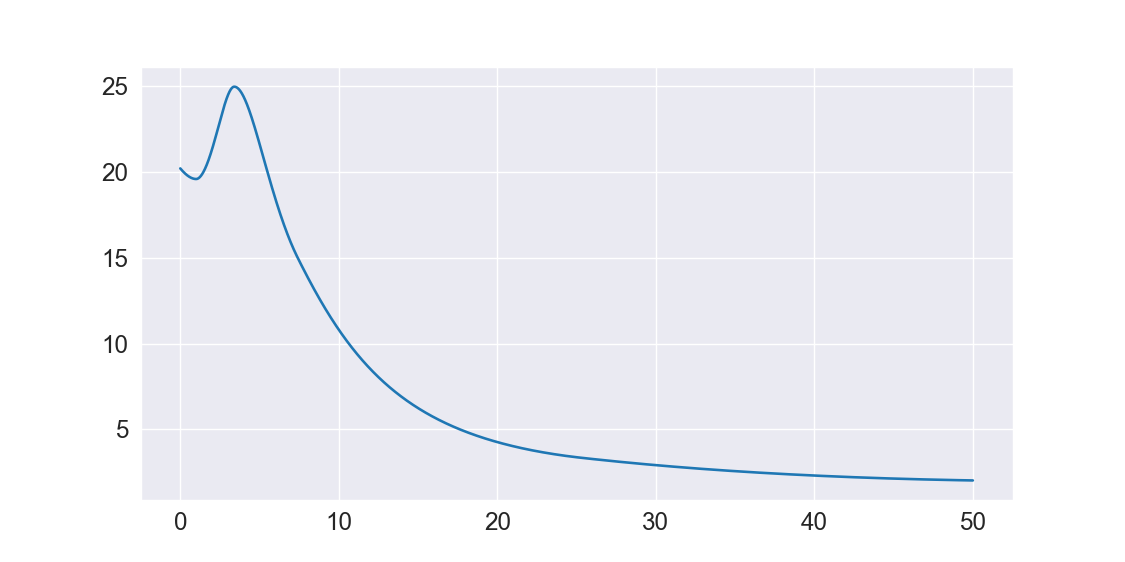

In [31]:
plt.figure()
plt.plot(rsp_pilot_interval[2]['RSP_Clean'])

<IPython.core.display.Javascript object>


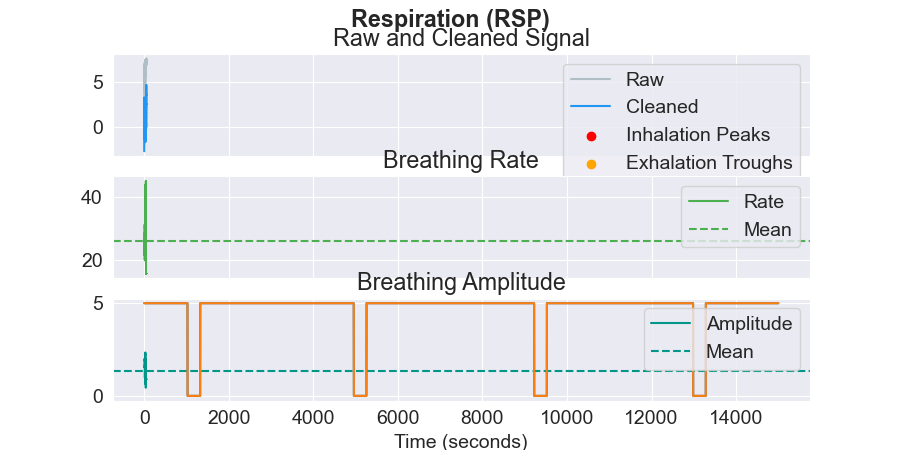

In [46]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/master/data/bio_resting_5min_100hz.csv")
# Process rsp
rsp_signals, info = nk.rsp_process(rsp_pilot_interval[1]['RSP_Raw'], sampling_rate=2000)
plot = nk.rsp_plot(rsp_signals[:3000], sampling_rate=2000)

In [47]:
rsp_signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs
0.0000,1.222229,-2.625356,1.548505,26.820512,NaN,0.0,0.0,0.0
0.0005,1.222229,-2.615220,1.548505,26.820512,NaN,NaN,NaN,NaN
0.0010,1.223145,-2.605057,1.548505,26.820512,NaN,NaN,NaN,NaN
0.0015,1.223145,-2.594869,1.548505,26.820512,NaN,NaN,NaN,NaN
0.0020,1.222839,-2.584657,1.548505,26.820512,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99995.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99996.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99997.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
99998.0000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [48]:
rsp_pilot_interval[1]

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs,Index,Label,Condition
0.0000,1.222229,-2.616742,5.054635,20.816079,0.0,0.970231,0.0,0.0,425154,1,3
0.0005,1.222229,-2.617078,5.054355,20.815011,0.0,0.970479,0.0,0.0,425155,1,3
0.0010,1.223145,-2.617412,5.054075,20.813943,0.0,0.970727,0.0,0.0,425156,1,3
0.0015,1.223145,-2.617743,5.053795,20.812876,0.0,0.970975,0.0,0.0,425157,1,3
0.0020,1.222839,-2.618071,5.053515,20.811808,0.0,0.971223,0.0,0.0,425158,1,3
...,...,...,...,...,...,...,...,...,...,...,...
49.9980,7.509155,0.423156,2.243203,1.389070,1.0,0.797474,0.0,0.0,525149,1,3
49.9985,7.510376,0.423571,2.243210,1.389064,1.0,0.797491,0.0,0.0,525150,1,3
49.9990,7.510986,0.423984,2.243217,1.389057,1.0,0.797508,0.0,0.0,525151,1,3
49.9995,7.510376,0.424398,2.243224,1.389051,1.0,0.797524,0.0,0.0,525152,1,3


In [74]:
nk.rsp_intervalrelated(rsp_pilot_interval[1]['RSP_Clean'],sampling_rate=100)


UnboundLocalError: local variable 'rsp_intervals' referenced before assignment

In [79]:
rsp_pilot_interval[2][1:]

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs,Index,Label,Condition
1.00001,5.786133,1.737434,4.273883,19.582250,1.0,0.998549,0.0,0.0,1428540,2,3
1.00051,5.787048,1.737453,4.273757,19.582248,1.0,0.998912,0.0,0.0,1428541,2,3
1.00101,5.786438,1.737468,4.273632,19.582247,1.0,0.999275,0.0,0.0,1428542,2,3
1.00151,5.787048,1.737480,4.273507,19.582246,1.0,0.999637,0.0,0.0,1428543,2,3
1.00201,5.787048,1.737487,4.273382,19.582246,1.0,1.000000,0.0,0.0,1428544,2,3
...,...,...,...,...,...,...,...,...,...,...,...
49.99800,7.290649,0.252217,2.801523,2.030852,1.0,0.807988,0.0,0.0,1526535,2,3
49.99850,7.290649,0.251902,2.801557,2.030845,1.0,0.808006,0.0,0.0,1526536,2,3
49.99900,7.290649,0.251586,2.801590,2.030837,1.0,0.808023,0.0,0.0,1526537,2,3
49.99950,7.289124,0.251270,2.801623,2.030830,1.0,0.808040,0.0,0.0,1526538,2,3


<IPython.core.display.Javascript object>


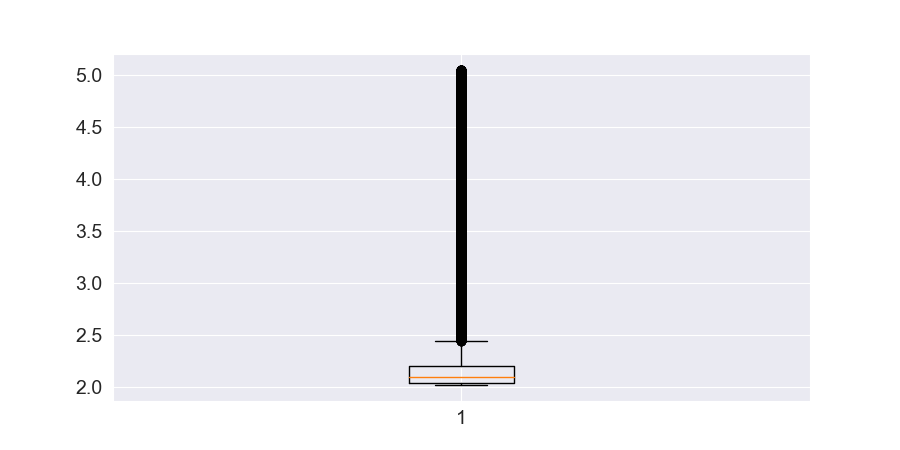

{'boxes': [<matplotlib.lines.Line2D at 0x21ee1df8780>],
 'caps': [<matplotlib.lines.Line2D at 0x21ee1df8f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x21ee1e087f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21ee1e08518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21ee1df8978>,
  <matplotlib.lines.Line2D at 0x21ee1df8c50>]}

In [77]:
plt.figure()
plt.boxplot(rsp_pilot_interval[1]['RSP_Amplitude'])

<IPython.core.display.Javascript object>


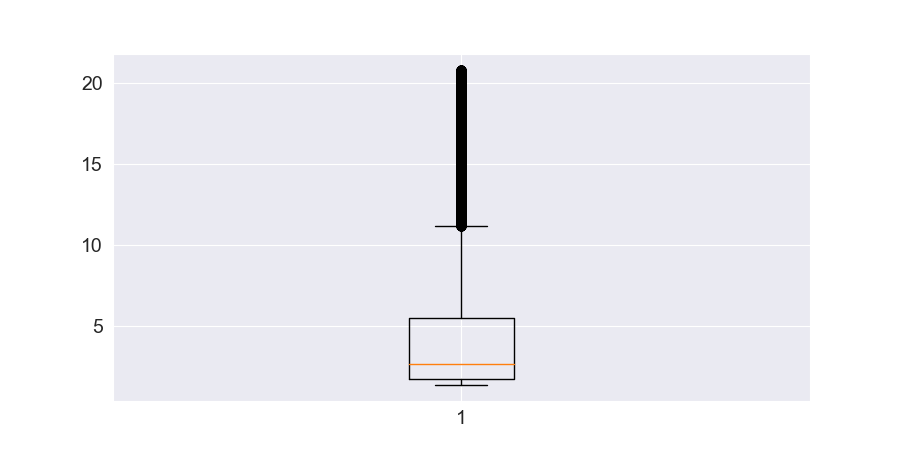

{'boxes': [<matplotlib.lines.Line2D at 0x21ed502db38>],
 'caps': [<matplotlib.lines.Line2D at 0x21ed503c3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21ed503cc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21ed503c978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21ed502ddd8>,
  <matplotlib.lines.Line2D at 0x21ed503c0f0>]}

In [78]:
plt.figure()
plt.boxplot(rsp_pilot_interval[1]['RSP_Rate'])

In [60]:
z = np.zeros(len(rsp_pilot_interval[1]['Label']))

<IPython.core.display.Javascript object>


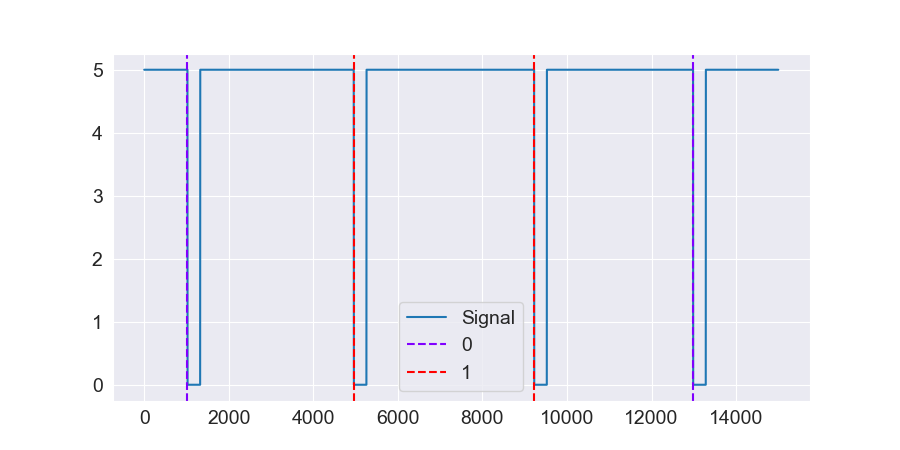

<IPython.core.display.Javascript object>


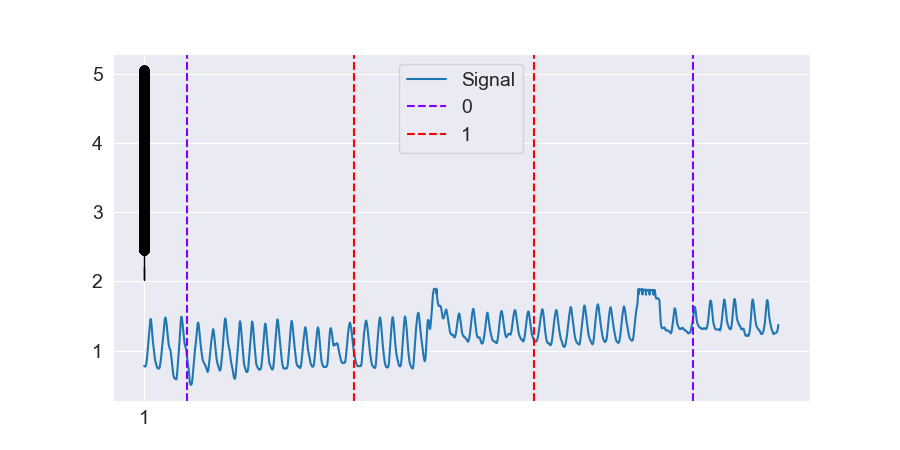

In [68]:
# Retrieve ECG data from data folder (sampling rate= 1000 Hz)
data = nk.data("bio_eventrelated_100hz")
# Visualize the event-marking channel
plt.plot(data['Photosensor'])
condition_list = ["Negative", "Neutral", "Neutral", "Negative"]
# Find events
events = nk.events_find(event_channel=data["Photosensor"],
                        threshold_keep='below',
                        event_conditions=condition_list)

events
plot = nk.events_plot(events, data['Photosensor'])
plot = nk.events_plot(events, data['RSP'])

In [71]:
data

,ECG,EDA,Photosensor,RSP
0,-0.015869,13.196868,5.0,0.778931
1,-0.011703,13.197173,5.0,0.777588
2,-0.009766,13.197020,5.0,0.777435
3,-0.013321,13.197631,5.0,0.777557
4,-0.009583,13.196715,5.0,0.775299
...,...,...,...,...
14995,-0.007675,14.873656,5.0,1.351868
14996,-0.005203,14.873961,5.0,1.356689
14997,-0.004272,14.874266,5.0,1.361938
14998,-0.000458,14.875335,5.0,1.366821
